# VGCharts till 2024 EDA (Exploratory Data Analysis) using pandas and plotly)!

## Reading, Framing and Fixing Dataframes start ->

### Import libraries and packages as well as reading `vgchartz-2024.csv`

In [1]:
import pandas as pd, plotly.express as px
import seaborn as sns, matplotlib.pyplot as plt
from dash import dcc
from plotly.subplots import make_subplots as mks
sns.set_theme(rc={'figure.figsize':(20,8.27)})
df = pd.read_csv("vgchartz-2024.csv")
dfN = df.copy()
dfN = df.drop('img', axis=1)
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


### Here the datetime has been converted into better format to remove the year for latter analysis

In [2]:
dfN['release_date'] = pd.to_datetime(dfN['release_date'])
dfN['rd_year'] = dfN['release_date'].dt.year
dfN75_00 = dfN[dfN['rd_year'].astype('str').str.contains('1975|1976|1977|1978|1979|1980|1981|1982|1983|1984|1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|1995|1996|1997|1998|1999')].drop(columns='last_update').copy()
dfN01_25 = dfN[dfN['rd_year'].astype('str').str.contains('2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023|2024|2025')].copy()

### Finding unqiues across the `str` columns

In [3]:
unqiueTitle = dfN['title'].unique()
uniqueCon = dfN['console'].unique()
uniqueGenre = dfN['genre'].unique()
uniquePub = dfN['publisher'].unique()
uniqueDev = dfN['developer'].unique()

print(len(unqiueTitle))
print(len(uniqueCon))
print(len(uniqueGenre))
print(len(uniquePub))
print(len(uniqueDev))

39798
81
20
3383
8863


## Analysis start ->


### TAKES THE HIGHEST SALES, FOR EACH GROUP, AND GIVES AN ANALYSIS FOR,
### NOTE: The values are taken over the time, i.e, from 1977-2024
#### 1. TITLES
#### 2. PUBLISHERS
#### 3. DEVELOPERS
#### 4. CONSOLES

### Popular Titles:

In [ ]:

dfN_PopularTitles = dfN.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['title'], as_index=False).sum().copy()

salesarr = {'total_sales':'Total Sales over the Globe','jp_sales':'Japan Sales','na_sales':'North America Sales','pal_sales':'Europe and Africa Sales','other_sales':'Other Sales across the Globe'}
#Seaborn Approach
for key_a in salesarr:
    HighestDf = dfN_PopularTitles.sort_values(by=f'{key_a}', ascending = False)[:20]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            plt.figure()
            figBar= sns.barplot(x=HighestDf['title'], y=HighestDf[key_b], hue=HighestDf['title'], errorbar=('ci', False))
            for container in figBar.containers:
                figBar.bar_label(container)
            plt.xticks(rotation=85)
            figBar.set_title(f'{value_b}')

#Plotly Express Approach
# for key_a in salesarr:
#     HighestDf = dfN_PopularTitles.sort_values(by=f'{key_a}', ascending = False)[:15]
#     for key_b, value_b in salesarr.items():
#         if key_b == key_a:
#             figHist = px.histogram(HighestDf, x= HighestDf['title'], y = HighestDf[f'{key_b}'], color=HighestDf['title'], labels={'title': 'Game',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Highest Selling games based on {value_b}')
#             figHist.update_layout(height=750).show()

### Popular Publishers:

In [ ]:
dfN_PopPublishers_Sales = dfN.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['publisher'], as_index=False).sum().copy()

#Seaborn Approach
for key_a in salesarr:
    HighestDf = dfN_PopPublishers_Sales.sort_values(by=f'{key_a}', ascending = False)[:20]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            plt.figure()
            figBar= sns.barplot(x=HighestDf['publisher'], y=HighestDf[key_b], hue=HighestDf['publisher'], errorbar=('ci', False))
            for container in figBar.containers:
                figBar.bar_label(container)
            plt.xticks(rotation=85)
            figBar.set_title(f'{value_b}')

# #Plotly Express approach
# for key_a in salesarr:
#     HighestDf = dfN_PopPublishers_Sales.sort_values(by=f'{key_a}', ascending = False)[:15]
#     for key_b, value_b in salesarr.items():
#         if key_b == key_a:
#             figHist = px.histogram(HighestDf, x= HighestDf['publisher'], y = HighestDf[f'{key_b}'], color=HighestDf['publisher'], labels={'publisher': 'Publisher',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Publishers that sold the most games based on {value_b}')
#             figHist.update_layout(height=750).show()

### Popular Developers:

In [ ]:
dfN_PopDevelopers_Sales = dfN.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['developer'], as_index=False).sum().copy()

#Seaborn Approach
for key_a in salesarr:
    HighestDf = dfN_PopDevelopers_Sales.sort_values(by=f'{key_a}', ascending = False)[:20]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            plt.figure()
            figBar= sns.barplot(x=HighestDf['developer'], y=HighestDf[key_b], hue=HighestDf['developer'], errorbar=('ci', False))
            for container in figBar.containers:
                figBar.bar_label(container)
            plt.xticks(rotation=85)
            figBar.set_title(f'{value_b}')

#Plotly Express Approach
# for key_a in salesarr:
#     HighestDf = dfN_PopDevelopers_Sales.sort_values(by=f'{key_a}', ascending = False)[:15]
#     for key_b, value_b in salesarr.items():
#         if key_b == key_a:
#             figHist = px.histogram(HighestDf, x= HighestDf['developer'], y = HighestDf[f'{key_b}'], color=HighestDf['developer'], labels={'developer': 'Developer',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Developers that sold the most games based on {value_b}')
#             figHist.update_layout(height=750).show()

### Popular Consoles:

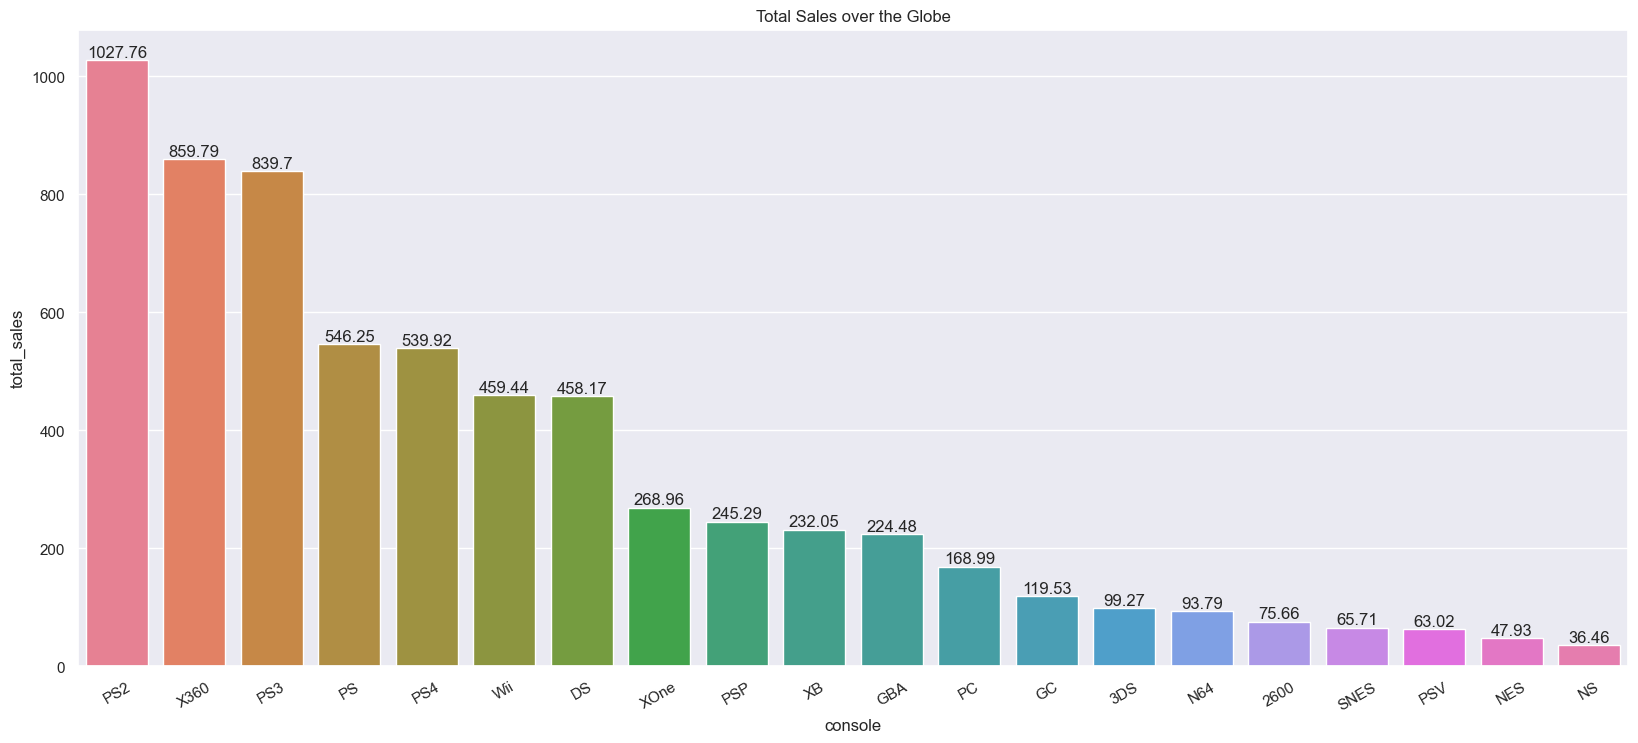

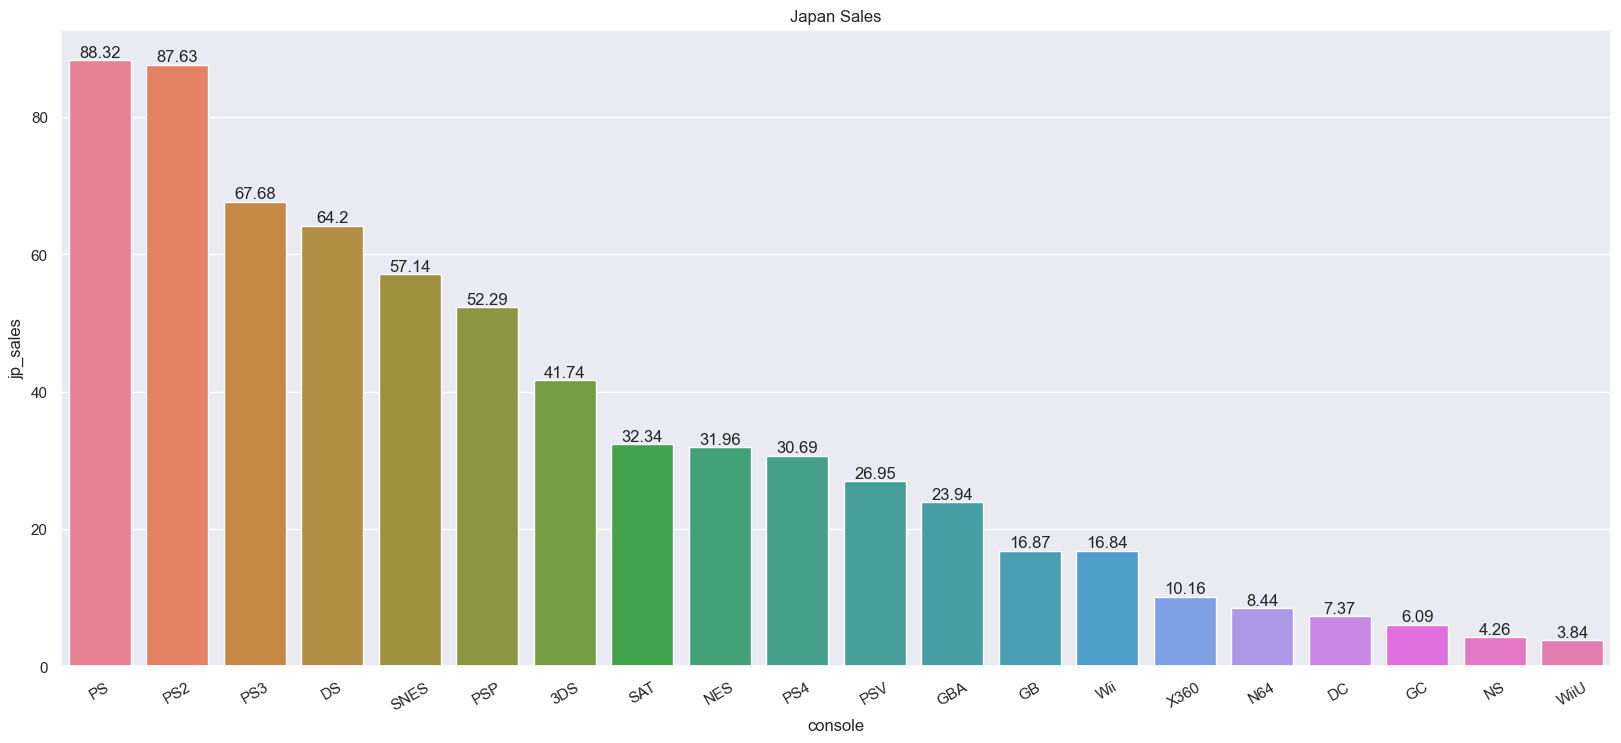

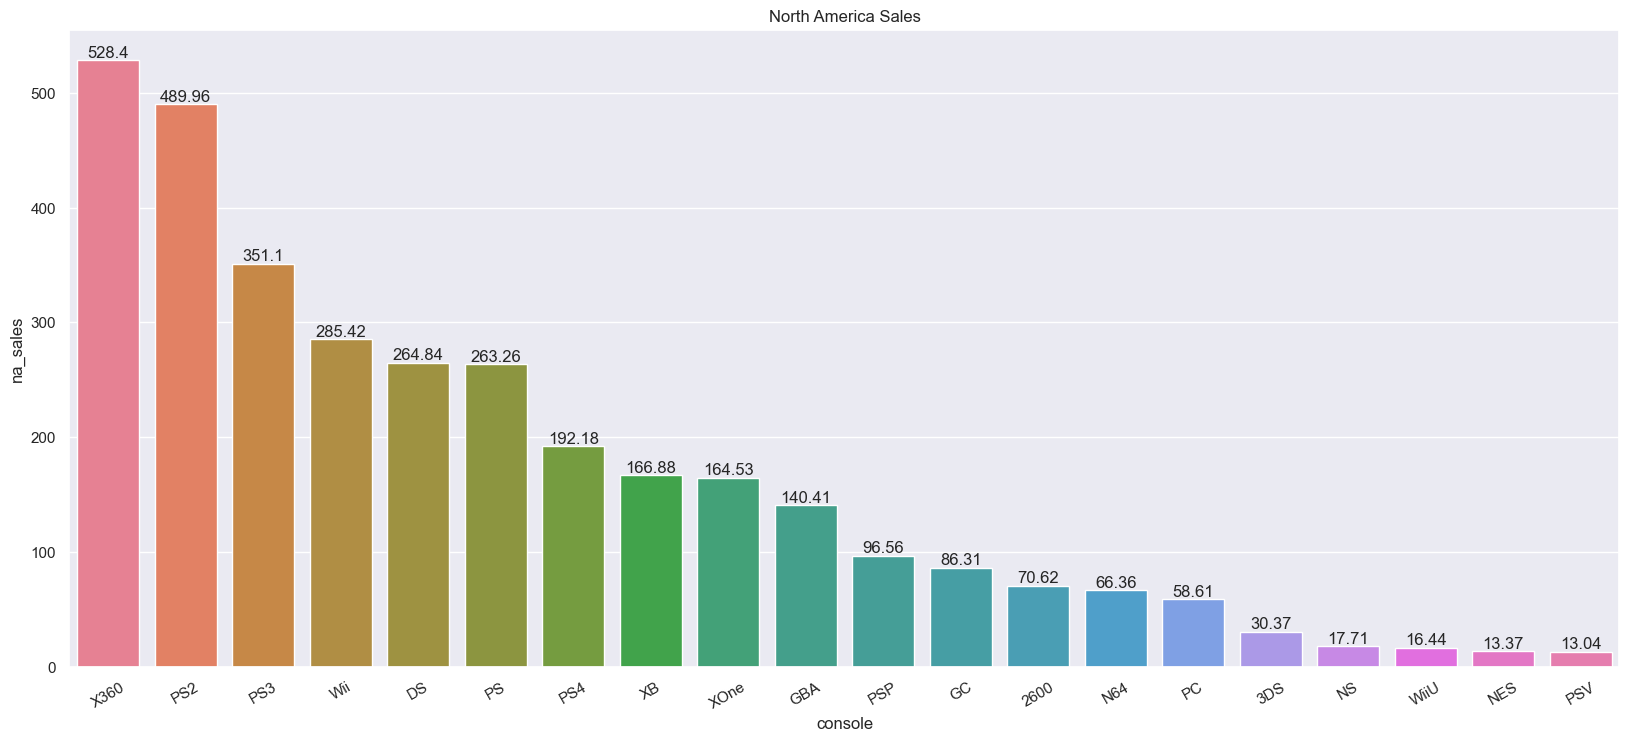

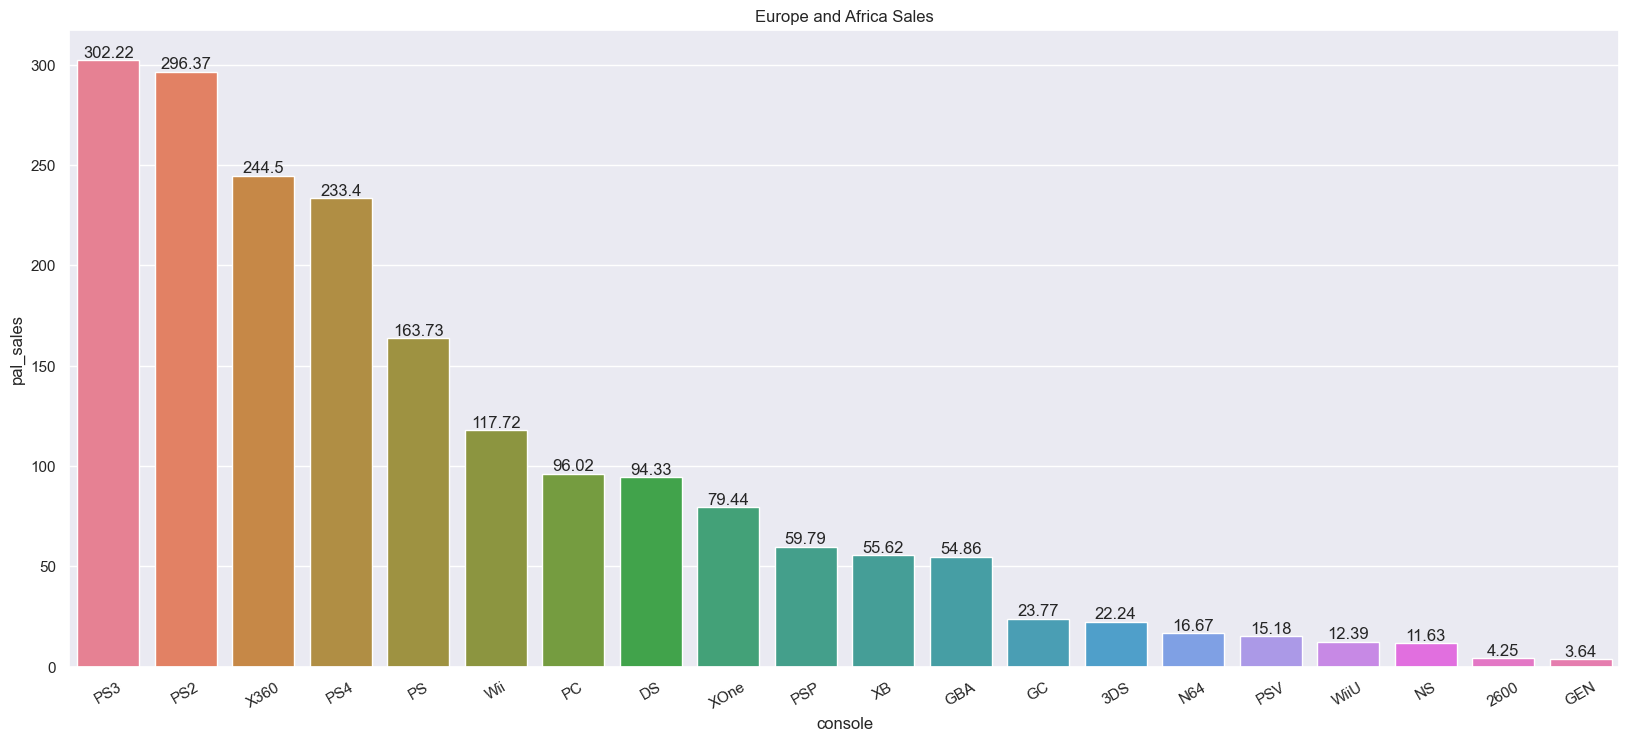

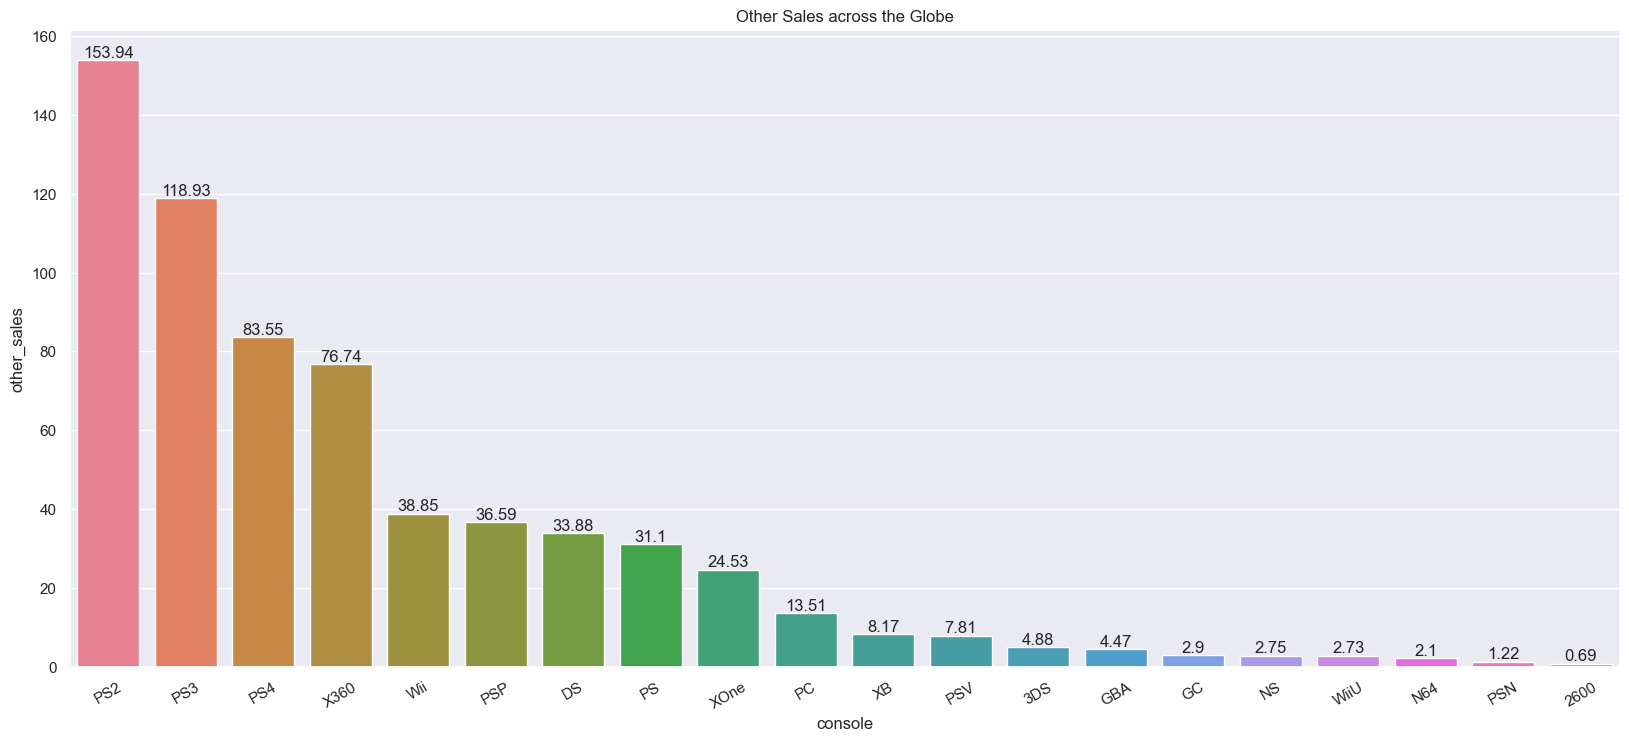

In [21]:
dfN_PopularConsole = dfN.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['console'], as_index=False).sum().copy()

#Seaborn Approach
for key_a in salesarr:
    HighestDf = dfN_PopularConsole.sort_values(by=f'{key_a}', ascending = False)[:20]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            plt.figure()
            figBar= sns.barplot(x=HighestDf['console'], y=HighestDf[key_b], hue=HighestDf['console'], errorbar=('ci', False))
            for container in figBar.containers:
                figBar.bar_label(container)
            plt.xticks(rotation=30)
            figBar.set_title(f'{value_b}')

#Plotly Express Approach
# for key_a in salesarr:
#     HighestDf = dfN_PopularConsole.sort_values(by=f'{key_a}', ascending = False)[:15]
#     for key_b, value_b in salesarr.items():
#         if key_b == key_a:
#             figHist = px.histogram(HighestDf, x= HighestDf['console'], y = HighestDf[f'{key_b}'], color=HighestDf['console'], labels={'console': 'Console',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Consoles that contributed to {value_b}')
#             figHist.update_layout(height=750).show()

### ON THE BASIS OF CRITIC SCORES
#### Note : `Following caution must be taken that the critic score are considered with accordance to the total sales overall, this is done as most games don't have a critic score for particular consoles, while others dont have any. This affects the overall mean() and so has been ignored.`

In [8]:
dfNa = dfN[dfN['critic_score'] != 0].copy()

dfNb = dfNa.drop(columns=['release_date', 'last_update', 'rd_year', 'developer', 'publisher', 'console', 'genre']).groupby(by='title')['critic_score'].mean().to_numpy()

dfNc = dfNa.drop(columns=['release_date', 'last_update', 'rd_year', 'developer', 'publisher', 'console', 'genre', 'critic_score']).groupby(by=['title'], as_index=False).sum()


dfNc['critic_score_mean'] = dfNb
dfNc = dfNc.sort_values(by=['total_sales','critic_score_mean'], ascending = False).head(15)

figHist2 = px.histogram(dfNc, x='title',y='critic_score_mean',color='title',color_discrete_sequence=["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"],title='Critic Score with respect to Total sales across the Globe')
figHist2.update_layout(height=750).show()

### THIS DISPLAYS WHICH GENRE IS PREFERED ON THE BASIS OF THE SALES
#### FIRST IS OVERALL, THE REST IS FROM YEAR 1975-2000 AND THEN 2001-2024

In [9]:
dfN_PopGenre = dfN.drop(columns=['release_date','last_update']).groupby(['genre'], as_index=False).sum().copy()
dfN_PopGenre_75_00 = dfN75_00.drop(columns='release_date').groupby(['genre'], as_index=False).sum().copy()
dfN_PopGenre_01_25 = dfN01_25.drop(columns='release_date').groupby(['genre'], as_index=False).sum().copy()


print('These are the genres that have been popular over the time, i.e. from 1975-2025')
for value in salesarr:
    pie_fig = px.pie(dfN_PopGenre, values=f'{value}', names='genre',labels={f'{value}':f'{value}', 'genre':'Genre'}, color_discrete_sequence=px.colors.qualitative.Vivid, title=f'The sales are given with accordance to {value}')
    pie_fig.show()

print('These are the genres that have been popular from 1975-2000')
for value in salesarr:
    pie_fig = px.pie(dfN_PopGenre_75_00, values=f'{value}', names='genre',labels={f'{value}':f'{value}', 'genre':'Genre'}, color_discrete_sequence=px.colors.qualitative.Vivid, title=f'The sales are given with accordance to {value}')
    pie_fig.show()

print('These are the genres that have been popular from 2001-2024')
for value in salesarr:
    pie_fig = px.pie(dfN_PopGenre_01_25, values=f'{value}', names='genre',labels={f'{value}':f'{value}', 'genre':'Genre'}, color_discrete_sequence=px.colors.qualitative.Vivid, title=f'The sales are given with accordance to {value}')
    pie_fig.update_layout(height=750).show()

These are the genres that have been popular over the time, i.e. from 1975-2025


These are the genres that have been popular from 1975-2000


These are the genres that have been popular from 2001-2024


### THE FOLLOWING SEGREGATES THE ABOVE DATAFRAME INTO 1975-2000 AND 2001-2024
#### NOTE: `HOWEVER GAMES WITHOUT RELEASE DATE HAVE BEEN IGNORED AS THE DATASET DOESN'T INCLUDE IT AND ASSUMING DATES WOULD HAMPER THE DATA ANALYSIS`

### Popular Titles :

In [10]:
dfN_PopTitles_Sales_75_00 = dfN75_00.drop(columns=['release_date','rd_year']).groupby(['title'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopTitles_Sales_75_00.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['title'], y = HighestDf[f'{key_b}'], color=HighestDf['title'], labels={'title': 'Games',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Highest Selling Games from 1975-2000 based on {value_b}')
            figHist.update_layout(height=750).show()

dfN_PopTitles_Sales_01_25 = dfN01_25.drop(columns=['release_date','rd_year']).groupby(['title'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopTitles_Sales_01_25.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['title'], y = HighestDf[f'{key_b}'], color=HighestDf['title'], labels={'title': 'Games',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Highest Selling Games from 2001-2024 based on {value_b}')
            figHist.update_layout(height=750).show()

### Popular Developers :

In [11]:
dfN_PopDevelopers_Sales_75_00 = dfN75_00.drop(columns=['release_date','rd_year']).groupby(['developer'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopDevelopers_Sales_75_00.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['developer'], y = HighestDf[f'{key_b}'], color=HighestDf['developer'], labels={'developer': 'Developer',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Developers during 1975-2000 based on {value_b}')
            figHist.update_layout(height=750).show()

dfN_PopDevelopers_Sales_01_25 = dfN01_25.drop(columns=['release_date','rd_year']).groupby(['developer'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopDevelopers_Sales_01_25.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['developer'], y = HighestDf[f'{key_b}'], color=HighestDf['developer'], labels={'developer': 'Developer',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Developers during 2001-2024 based on {value_b}')
            figHist.update_layout(height=750).show()

### Popular Publishers :

In [12]:
dfN_PopPublishers_Sales_75_00 = dfN75_00.drop(columns=['release_date','rd_year']).groupby(['publisher'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopPublishers_Sales_75_00.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['publisher'], y = HighestDf[f'{key_b}'], color=HighestDf['publisher'], labels={'publisher': 'Publisher',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Publishers during 1975-2000 based on {value_b}')
            figHist.update_layout(height=750).show()

dfN_PopPublishers_Sales_01_25 = dfN01_25.drop(columns=['release_date','rd_year']).groupby(['publisher'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopPublishers_Sales_01_25.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['publisher'], y = HighestDf[f'{key_b}'], color=HighestDf['publisher'], labels={'publisher': 'Publisher',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Publishers during 2001-2024 based on {value_b}')
            figHist.update_layout(height=750).show()

### Popular Consoles :

In [13]:
dfN_PopConsoles_Sales_75_00 = dfN75_00.drop(columns=['release_date','rd_year']).groupby(['console'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopConsoles_Sales_75_00.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['console'], y = HighestDf[f'{key_b}'], color=HighestDf['console'], labels={'console': 'Developer',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Consoles during 1975-2000 based on {value_b}')
            figHist.update_layout(height=750).show()

dfN_PopConsoles_Sales_01_25 = dfN01_25.drop(columns=['release_date','rd_year']).groupby(['console'], as_index=False).sum().copy()

for key_a in salesarr:
    HighestDf = dfN_PopConsoles_Sales_01_25.sort_values(by=f'{key_a}', ascending = False)[:15]
    for key_b, value_b in salesarr.items():
        if key_b == key_a:
            figHist = px.histogram(HighestDf, x= HighestDf['console'], y = HighestDf[f'{key_b}'], color=HighestDf['console'], labels={'console': 'Developer',f'{key_b}':'copies in million'}, color_discrete_sequence= ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], text_auto=True, title=f'Top Consoles during 2001-2024 based on {value_b}')
            figHist.update_layout(height=750).show()



### Following consist of Funnel plots

In [14]:
dfN_S = dfN.dropna(subset=['total_sales','na_sales','jp_sales','pal_sales','other_sales']).copy()

dfN_Scatter = dfN_S.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['genre'], as_index=False).sum().copy()

for key_a, value_a in salesarr.items():
    HighestDf = dfN_Scatter.sort_values(by=f'{key_a}', ascending = False)
    figFunnel = px.funnel(HighestDf, x= HighestDf['genre'], y = HighestDf[f'{key_a}'], color='genre', labels={'title': 'Games',f'{key_a}':'copies in million'}, color_discrete_sequence=
    ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], title=f'{value_a}')
    # figHeat = px.density_heatmap(HighestDf,x= HighestDf[f'{key_b}'], y = HighestDf['total_sales'])
    # figHeat.show()
    figFunnel.update_layout(height=750).show()


In [15]:
dfN_Titles = dfN.drop(columns='release_date').drop(columns='last_update').drop(columns='rd_year').groupby(['title'], as_index=False).sum().copy()

for key_a, value_a in salesarr.items():
    HighestDf = dfN_Titles.sort_values(by=f'{key_a}', ascending = False)[:20]
    figFunnel = px.funnel(HighestDf, x= HighestDf['title'], y = HighestDf[f'{key_a}'], color='title', labels={'title': 'Games',f'{key_b}':'copies in million'}, color_discrete_sequence=
    ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"], title=f'{value_a}')
    # figHeat = px.density_heatmap(HighestDf,x= HighestDf[f'{key_b}'], y = HighestDf['total_sales'])
    # figHeat.show()
    figFunnel.update_layout(height=750).show()